<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Model-1:-Full-Series-of-Publications" data-toc-modified-id="Model-1:-Full-Series-of-Publications-1">Model 1: Full Series of Publications</a></span><ul class="toc-item"><li><span><a href="#LDA-modelling:" data-toc-modified-id="LDA-modelling:-1.1">LDA modelling:</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-1.2">Visualisation</a></span><ul class="toc-item"><li><span><a href="#HDP-Model?" data-toc-modified-id="HDP-Model?-1.2.1">HDP Model?</a></span></li></ul></li></ul></li><li><span><a href="#Model-2:-2012-2017-LDA" data-toc-modified-id="Model-2:-2012-2017-LDA-2">Model 2: 2012-2017 LDA</a></span></li><li><span><a href="#Distribution-of-topics-for-each-publications:" data-toc-modified-id="Distribution-of-topics-for-each-publications:-3">Distribution of topics for each publications:</a></span></li><li><span><a href="#Distribution-of-topics-for-each-individual" data-toc-modified-id="Distribution-of-topics-for-each-individual-4">Distribution of topics for each individual</a></span></li></ul></div>

# Model 1: Full Series of Publications

From `preprocess_pubs.ipynb` in [infnet-scrapper](../infnet-scrapper/notebooks/preprocess_pubs.ipynb), we generate tokens for our publications.

Now, we use these tokens to create a dictionary, corpus, and topic models for each of the documents

In [1]:
import cPickle as pkl
from gensim import models
from gensim.corpora import Dictionary

In [2]:
# ref: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/Gensim%20Newsgroup.ipynb
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [3]:
pyLDAvis.enable_notebook()

In [32]:
pub_toks = pkl.load(open('../infnet-scrapper/data/pub_toks.pkl'))

In [33]:
pub_toks.head(3)

,year,summary_toks
pub_id,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehens, syntax, syntax, comprehens, close..."


In [34]:
toks = pub_toks.summary_toks.tolist() # List of List

In [35]:
# Create the dictionary mapping:
dictionary = Dictionary(toks)
dictionary.compactify()
dictionary.filter_extremes(no_below=20, no_above=0.1) # ignore words that appear in less than 20 documents or more than 10% documents
# Create a bow tagging for each publication:
bowified = lambda row: dictionary.doc2bow(row.summary_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

In [38]:
# Save the dictionary:
dictionary.save('dictionary.pkl', pickle_protocol=-1)

In [36]:
pub_toks.head(2)

,year,summary_toks,bow
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar...","[(40, 2), (156, 1), (223, 2), (293, 2), (328, ..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust...","[(40, 1), (229, 1), (253, 1), (319, 2), (330, ..."


In [37]:
# Generate a corpus based on the tokens, which we will be using later
corpus = pub_toks.bow.tolist()

## LDA modelling:

In [39]:
num_topics = 20
lda = models.ldamodel.LdaModel(
    corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

In [58]:
# Save the model:
lda.save('fullpub.ldamodel')

## Visualisation

In [40]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)

/Users/weiting/miniconda3/envs/py27/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [41]:
pyLDAvis.display(vis_data)

# Model 2: 2012-2017 LDA
Instead of using the entire collection, we use the collection from the past five years

In [42]:
import pandas as pd

In [43]:
gb = pub_toks.groupby('year')

In [44]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print("{}:\t{}".format(yr, len(group)))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [45]:
combined_yrs = pd.concat(pd_years.values())
print("Total publications: ",len(combined_yrs))

('Total publications: ', 3574)


In [46]:
combined_yrs.head(3)

,year,summary_toks,bow
pub_id,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,"[probabilist, program, spreadsheet, queri, des...","[(90, 2), (141, 1), (176, 1), (389, 2), (436, ..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,"[artifici, person, disfluenc, focus, paper, ar...","[(18, 3), (215, 2), (381, 1), (498, 1), (500, ..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,"[anchor, knowledg, interact, toward, harmon, s...","[(164, 1), (248, 1), (307, 1), (317, 1), (319,..."


In [47]:
length = combined_yrs.apply(lambda row: len(row.summary_toks),axis=1)

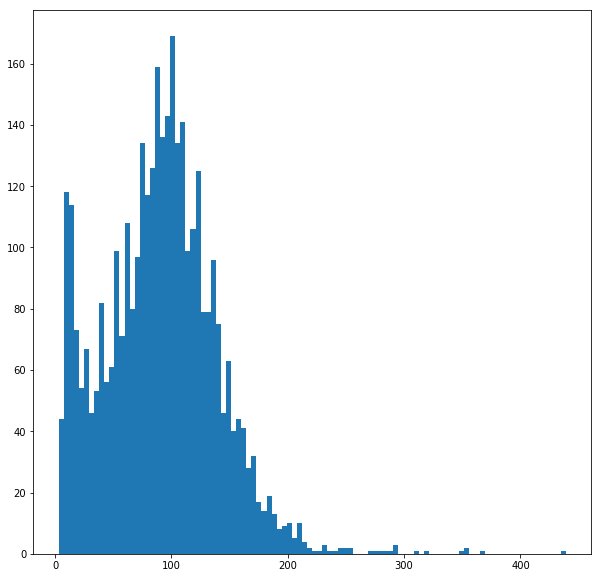

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.hist(length,bins=100)
plt.show()

In [49]:
toks_6yr = combined_yrs.summary_toks.tolist() # List of List

In [50]:
# Create the dictionary mapping:
dictionary_6yr = Dictionary(toks_6yr)
dictionary_6yr.compactify()
dictionary.filter_extremes(no_below=20, no_above=0.1)
# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr.doc2bow(row.summary_toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [59]:
dictionary_6yr.save('dictionary_6yr.pkl', pickle_protocol=-1)

In [51]:
corpus_6yr = combined_yrs.bow.tolist()

In [52]:
num_topics = 20
lda_6yr = models.ldamodel.LdaModel(
    corpus=corpus_6yr, id2word=dictionary_6yr, num_topics=num_topics, passes=10)

In [57]:
# Save the model:
lda_6yr.save('lda_6yr.ldamodel')

In [53]:
lda_6yr.print_topics(num_topics=5, num_words=100) # Randomly choose 5 topics to display

[(17,
  u'0.025*"springer" + 0.019*"intern" + 0.016*"system" + 0.013*"berlin" + 0.013*"heidelberg" + 0.012*"confer" + 0.011*"use" + 0.010*"comput" + 0.010*"model" + 0.010*"agent" + 0.010*"proceed" + 0.009*"publish" + 0.008*"2013" + 0.008*"formal" + 0.008*"proof" + 0.007*"paper" + 0.007*"2012" + 0.006*"secur" + 0.006*"approach" + 0.006*"protocol" + 0.005*"problem" + 0.005*"set" + 0.005*"languag" + 0.005*"base" + 0.005*"present" + 0.005*"method" + 0.005*"state" + 0.004*"action" + 0.004*"theori" + 0.004*"logic" + 0.004*"learn" + 0.004*"2016" + 0.004*"2015" + 0.004*"semant" + 0.004*"2014" + 0.004*"domain" + 0.004*"part" + 0.004*"plan" + 0.004*"analysi" + 0.004*"properti" + 0.004*"show" + 0.004*"verif" + 0.004*"represent" + 0.004*"process" + 0.004*"septemb" + 0.003*"cham" + 0.003*"techniqu" + 0.003*"polici" + 0.003*"european" + 0.003*"reason" + 0.003*"result" + 0.003*"tool" + 0.003*"construct" + 0.003*"practic" + 0.003*"implement" + 0.003*"workshop" + 0.003*"first" + 0.003*"propos" + 0.003*

In [54]:
vis_data_6yr = gensimvis.prepare(lda_6yr, corpus_6yr, dictionary_6yr)

/Users/weiting/miniconda3/envs/py27/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [55]:
pyLDAvis.display(vis_data_6yr)